# CLV Analysis: Probabilistic Modeling + Optimization + Forecasting

## Time Series Forecast of Monthly Total CLV

CWD: c:\Users\bhati\OneDrive\Documents\Optimizing-Marketing-ROI\Notebooks
Files here: ['.gitkeep', 'clv_analysis.ipynb', 'data_cleaning.py', 'Feature_Engineering.py']


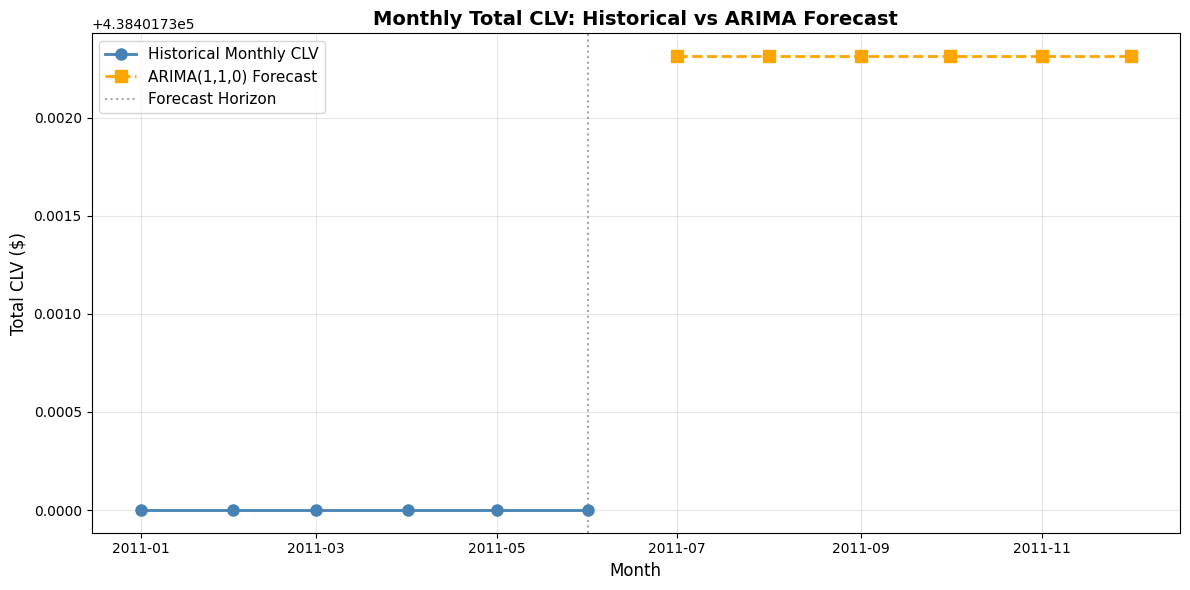

Average monthly CLV (historical): $438,402
Average monthly CLV (forecast):   $438,402


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Check where the notebook is running from
print("CWD:", os.getcwd())
print("Files here:", os.listdir())

# Load forecast created by clv_forecasting.py
# Notebook is in Notebooks/, data is in ../Data/processed/
monthly_forecast = pd.read_csv("../Data/processed/monthly_clv_forecast.csv", parse_dates=["month"])
monthly_forecast.set_index("month", inplace=True)

# Historical series (same 6 months used for ARIMA training)
historical = pd.Series(
    [438401.73] * 6,
    index=pd.date_range("2011-01-01", periods=6, freq="MS")
)

plt.figure(figsize=(12, 6))
plt.plot(historical.index, historical.values, "o-", color="steelblue",
         label="Historical Monthly CLV", linewidth=2, markersize=8)
plt.plot(monthly_forecast.index, monthly_forecast["forecast_clv"], "s--",
         color="orange", label="ARIMA(1,1,0) Forecast", linewidth=2, markersize=8)

plt.axvline(historical.index[-1], color="gray", linestyle=":", alpha=0.7, label="Forecast Horizon")
plt.title("Monthly Total CLV: Historical vs ARIMA Forecast", fontsize=14, fontweight="bold")
plt.ylabel("Total CLV ($)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average monthly CLV (historical): ${historical.mean():,.0f}")
print(f"Average monthly CLV (forecast):   ${monthly_forecast['forecast_clv'].mean():,.0f}")

## Budget Optimization Results

Using BG/NBD probabilistic CLV predictions, we optimized a fixed $100K marketing budget:

| Metric | Value |
|--------|-------|
| **Budget** | $100,000 |
| **Uniform CLV** | $2,636,039 |
| **Optimized CLV** | $2,724,476 |
| **Incremental Value** | **$88,437** |
| **Improvement** | **3.4%** |


## Connecting Optimization to Future Planning

1. **Current baseline**: ARIMA forecasts ~$438K monthly CLV over the next 6 months.
2. **With optimization**: Reallocate the $100K budget to high-CLV customers → **+3.4% total CLV**.
3. **Future scaling**: Re-run the optimization each month using updated probabilistic CLV and refreshed CLV forecasts.

**Key insight**: Probabilistic CLV (BG/NBD) identifies *who* to target, while time series forecasting shows *when* to expect revenue lift.
